In [73]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter

ROOT = Path(os.getcwd()).parents[0]
ROOT

PosixPath('/Users/dantrainer/projects/cancer_research')

In [2]:
DATA_PATH = os.path.join(ROOT, 'data', 'TCGA-BRCA.star_fpkm-uq.tsv')
CLINICAL_DATA_PATH = os.path.join(ROOT, 'data', 'TCGA-BRCA.clinical.tsv')

In [15]:
df = pd.read_csv(DATA_PATH, sep='\t', index_col=0).drop_duplicates()
df_clinical = pd.read_csv(CLINICAL_DATA_PATH, sep='\t', index_col=0).drop_duplicates()

display(df.head())
print(f"Number of genes: {df.shape[0]}")
print(f"Number of samples: {df.shape[1]}")
display(df_clinical.head())
print(f"Number of clinical samples: {df_clinical.shape[0]}")
print(f"Number of clinical features: {df_clinical.shape[1]}")

TCGA-D8-A146-01A  TCGA-AQ-A0Y5-01A  TCGA-C8-A274-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          3.767708          2.132741          4.768010   
ENSG00000000005.6           1.759454          0.146003          0.000000   
ENSG00000000419.13          4.920541          5.284151          5.051694   
ENSG00000000457.14          2.612588          2.428544          3.356299   
ENSG00000000460.17          1.363395          1.158337          2.458172   

                    TCGA-BH-A0BD-01A  TCGA-B6-A1KC-01B  TCGA-AC-A62V-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          3.049735          3.009311          2.262163   
ENSG00000000005.6           1.071763          0.185993          0.308594   
ENSG00000000419.13          4.618797          4.852973          5.364065   
ENSG00000000457.14          2.680774          2.381671          1.128095   
ENSG00000000460.17          2.494236          1.565841          1.249809   

                    TCGA-AO-A0J5-01A  TCGA-BH-A0B1-01A  TCGA-A2-A0YM-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          2.929999          4.243105          4.231540   
ENSG00000000005.6           0.467071          0.121281          0.124196   
ENSG00000000419.13          3.958935          5.171995          4.771500   
ENSG00000000457.14          2.787265          2.398214          1.637378   
ENSG00000000460.17          1.221939          1.857344          2.197771   

                    TCGA-AO-A03N-01B  TCGA-AO-A1KQ-01A  TCGA-E2-A1LI-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          3.126461          2.462209          4.018296   
ENSG00000000005.6           0.000000          0.070939          2.206831   
ENSG00000000419.13          5.550193          5.780208          5.665134   
ENSG00000000457.14          1.876527          2.266667          3.136930   
ENSG00000000460.17          1.396050          1.790438          3.277732   

                    TCGA-BH-A18L-11A  TCGA-B6-A0WV-01A  TCGA-E2-A1LE-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          4.114450          2.040121          3.719238   
ENSG00000000005.6           4.588013          0.217107          1.491751   
ENSG00000000419.13          4.712546          5.776983          4.827677   
ENSG00000000457.14          2.083792          2.284425          3.787600   
ENSG00000000460.17          0.824401          1.529571          2.107454   

                    TCGA-A2-A0CO-01A  TCGA-AN-A0AK-01A  TCGA-BH-A28Q-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          3.139240          0.673737          4.151226   
ENSG00000000005.6           1.438665          0.060047          0.091260   
ENSG00000000419.13          4.455222          4.859984          4.957297   
ENSG00000000457.14          2.255350          2.484860          3.349224   
ENSG00000000460.17          0.904812          1.815903          1.558904   

                    TCGA-3C-AALJ-01A  TCGA-BH-A0BM-01A  TCGA-AO-A03O-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          3.814540          4.792684          4.085467   
ENSG00000000005.6           1.380120          2.209578          0.423524   
ENSG00000000419.13          5.623179          4.710972          5.418075   
ENSG00000000457.14          1.812252          2.785739          2.133465   
ENSG00000000460.17          1.496462          1.051372          1.788059   

                    TCGA-AC-A4ZE-01A  TCGA-E9-A22A-01A  TCGA-AR-A0TW-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          3.275946          2.674754          2.522206   
ENSG00000000005.6           2.153546          0.212134       

Number of genes: 58049
Number of samples: 1226


,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,vital_status.demographic,age_at_index.demographic,days_to_birth.demographic,year_of_birth.demographic,year_of_death.demographic,primary_site.project,project_id.project,disease_type.project,name.project,name.program.project,tissue_source_site_id.tissue_source_site,code.tissue_source_site,name.tissue_source_site,project.tissue_source_site,bcr_id.tissue_source_site,days_to_death.demographic,entity_submitter_id.annotations,notes.annotations,submitter_id.annotations,classification.annotations,entity_id.annotations,created_datetime.annotations,annotation_id.annotations,entity_type.annotations,updated_datetime.annotations,case_id.annotations,state.annotations,category.annotations,status.annotations,case_submitter_id.annotations,synchronous_malignancy.diagnoses,ajcc_pathologic_stage.diagnoses,days_to_diagnosis.diagnoses,last_known_disease_status.diagnoses,tissue_or_organ_of_origin.diagnoses,days_to_last_follow_up.diagnoses,age_at_diagnosis.diagnoses,primary_diagnosis.diagnoses,prior_malignancy.diagnoses,year_of_diagnosis.diagnoses,prior_treatment.diagnoses,ajcc_staging_system_edition.diagnoses,ajcc_pathologic_t.diagnoses,morphology.diagnoses,ajcc_pathologic_n.diagnoses,ajcc_pathologic_m.diagnoses,classification_of_tumor.diagnoses,icd_10_code.diagnoses,site_of_resection_or_biopsy.diagnoses,tumor_grade.diagnoses,progression_or_recurrence.diagnoses,age_at_earliest_diagnosis.diagnoses.xena_derived,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,treatment_id.treatments.diagnoses,submitter_id.treatments.diagnoses,treatment_type.treatments.diagnoses,treatment_or_therapy.treatments.diagnoses,created_datetime.treatments.diagnoses,updated_datetime.treatments.diagnoses,state.treatments.diagnoses,sample_type_id.samples,tumor_descriptor.samples,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples
sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-BH-A0W3-01A,3c612e12-6de8-44fa-a095-805c45474821,Ductal and Lobular Neoplasms,3c612e12-6de8-44fa-a095-805c45474821,TCGA-BH-A0W3,Breast,Not Reported,white,female,not hispanic or latino,Alive,58.0,-21369.0,1952.0,NaN,Breast,TCGA-BRCA,"['Squamous Cell Neoplasms', 'Adnexal and Skin ...",Breast Invasive Carcinoma,TCGA,ad5db77f-ce9a-53c8-b7ff-7944acf5c0c6,BH,University of Pittsburgh,Breast invasive carcinoma,NCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Stage IIA,0.0,not reported,"Breast, NOS",728.0,21369.0,"Infiltrating duct carcinoma, NOS",no,2010.0,No,7th,T1c,8500/3,N1a,M0,not reported,C50.9,"Breast, NOS",Not Reported,not reported,21369.0,58.545205,"['1c5f5df0-9317-51f8-95fb-88357c15289d', '9c5a...","['TCGA-BH-A0W3_treatment_1', 'TCGA-BH-A0W3_tre...","['Pharmaceutical Therapy, NOS', 'Radiation The...","['no', 'yes']","['2019-04-28T13:48:22.214306-05:00', '']","['2019-07-31T21:37:34.195388-05:00', '2019-07-...","['released', 'released']",1,Primary,9ad80473-9148-45a7-ad6d-9936a899e022,Primary Tumor,Not Reported,85.0,120.0,OCT,801A4E2F-E26E-424F-BF42-CD0D9CD62BCE,True,Solid Tissue,NaN,False,Tumor,NaN
TCGA-AR-A24V-01A,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,Ductal and Lobular Neoplasms,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,TCGA-AR-A24V,Breast,Not Reported,white,female,not hispanic or latino,Alive,52.0,-19027.0,1954.0,NaN,Breast,TCGA-BRCA,"['Squamous Cell Neoplasms', 'Adnexal and Skin ...",Breast Invasive Carcinoma,TCGA,5e793cf6-1554-55db-b2ee-9c772717cea0,AR,Mayo,Breast invasive carcinoma,NCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Stage IIB,0.0,not reported,"Breast, NOS",3203.0,19027.0,"Infiltrating duct carcinoma, NOS",no,2006.0,No,6th,T2,850

Number of clinical samples: 1255
Number of clinical features: 84


## Estimate the Survival Function using Kaplan-Meier

Here, the `days_to_death.demographic` columns represent the days from initial diagnosis to death. This represents the time value for patients who had the event. The `days_to_last_follow_up.diagnosis` column represents the number of days from initial diagnosis to the last known follow up appointment, representing the time value for patients who are censored.

In [68]:
df_clinical[["days_to_death.demographic", "days_to_last_follow_up.diagnoses"]]

,days_to_death.demographic,days_to_last_follow_up.diagnoses
TCGA-BH-A0W3-01A,NaN,728.0
TCGA-AR-A24V-01A,NaN,3203.0
TCGA-E9-A1NE-01A,NaN,1088.0
TCGA-AC-A8OQ-01A,NaN,34.0
TCGA-AC-A23C-01A,NaN,585.0
...,...,...
TCGA-BH-A1FH-11B,1034.0,NaN
TCGA-BH-A1FH-01A,1034.0,NaN
TCGA-AR-A1AO-01A,NaN,2618.0
TCGA-A7-A0D9-01A,NaN,1139.0


Create an event and duration column following the standard Kaplan-Meier conventions.

In [81]:
df_clinical["event"] = df_clinical["days_to_last_follow_up.diagnoses"].isna().astype(int)
df_clinical["duration"] = df_clinical.apply(
    lambda x: x["days_to_death.demographic"] if x["event"] else x["days_to_last_follow_up.diagnoses"], 
    axis=1
    )
df_clinical["duration"] = df_clinical["duration"]/365  # Convert to years
df_clinical[["event", "duration"]]

,event,duration
TCGA-BH-A0W3-01A,0,1.994521
TCGA-AR-A24V-01A,0,8.775342
TCGA-E9-A1NE-01A,0,2.980822
TCGA-AC-A8OQ-01A,0,0.093151
TCGA-AC-A23C-01A,0,1.602740
...,...,...
TCGA-BH-A1FH-11B,1,2.832877
TCGA-BH-A1FH-01A,1,2.832877
TCGA-AR-A1AO-01A,0,7.172603
TCGA-A7-A0D9-01A,0,3.120548


Text(0.5, 1.0, 'Distribution of survival duration in TCGA-BRCA dataset')

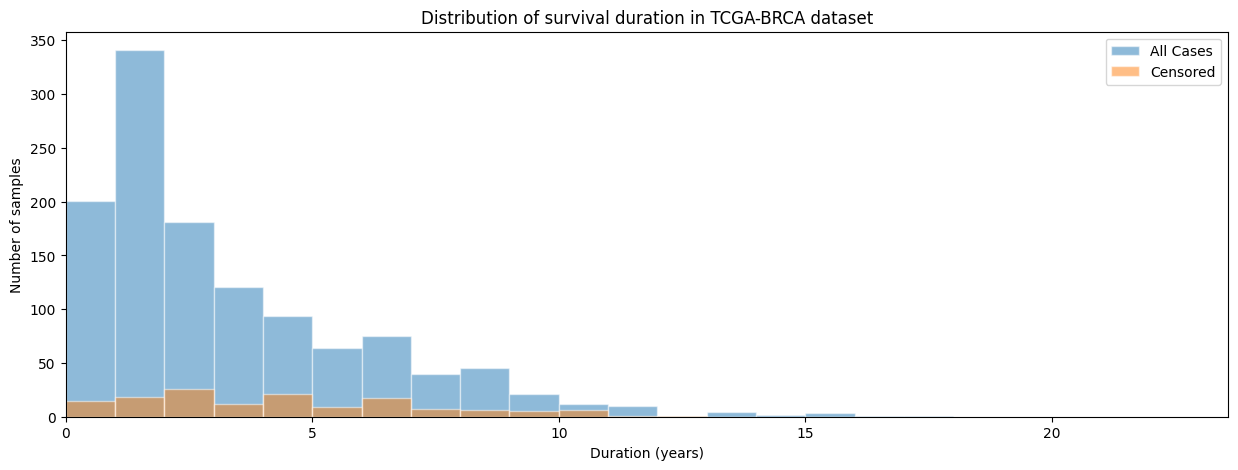

In [102]:
_, axes = plt.subplots(figsize=(15,5))

plt.hist(
    df_clinical["duration"], 
    bins=np.arange(0, 20, 1),
    alpha=0.5,
    label='All Cases',
    edgecolor='w'
)
plt.hist(
    df_clinical[df_clinical["event"]==1]["duration"], 
    bins=np.arange(0, 20, 1),
    alpha=0.5,
    label='Censored',
    edgecolor='w'
)
plt.xlim(0, df_clinical["duration"].max())
plt.xlabel("Duration (years)")
plt.ylabel("Number of samples")
plt.legend()
plt.title("Distribution of survival duration in TCGA-BRCA dataset")

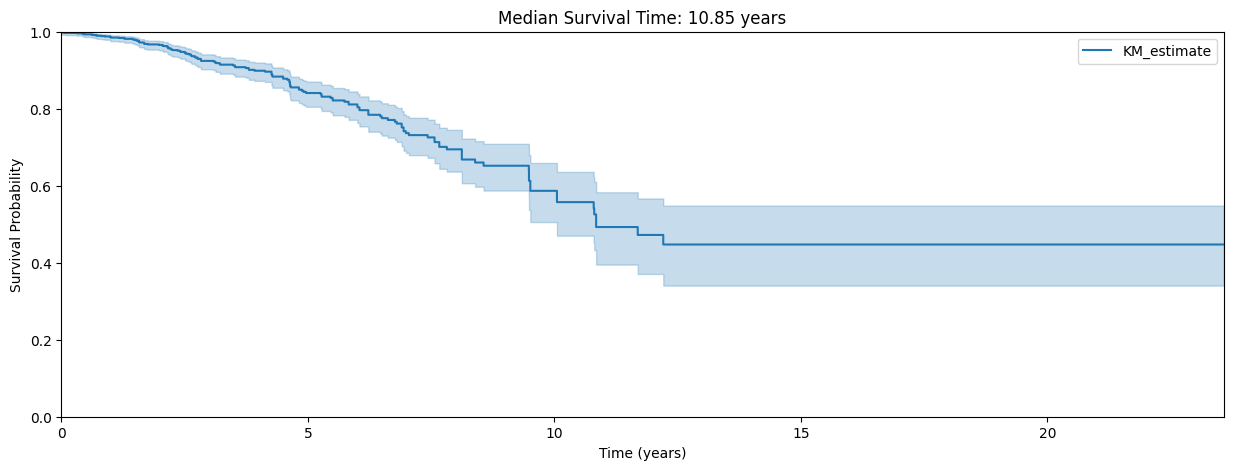

In [89]:
kmf = KaplanMeierFitter()

df_clinical = df_clinical.dropna(subset=["event", "duration"])
kmf.fit(df_clinical["duration"], event_observed=df_clinical["event"])

_, axes = plt.subplots(figsize=(15,5))
kmf.plot_survival_function()
plt.title(f"Median Survival Time: {kmf.median_survival_time_:.2f} years")
plt.xlabel("Time (years)")
plt.ylabel("Survival Probability")
plt.xlim(0, df_clinical["duration"].max())
plt.ylim(0, 1)

In this specific dataset, after 12 years of follow-up, no further deaths were observed. About 45% of the patients in this cohort survived for at least 12 years, at which point we no longer have complete information on them because the study period ended.

## Analyze Survival Time vs. ESR1 Expression

In [17]:
ESRA_Ensembl_ID = 'ENSG00000091831'
esra_expression = df.loc[ESRA_Ensembl_ID]

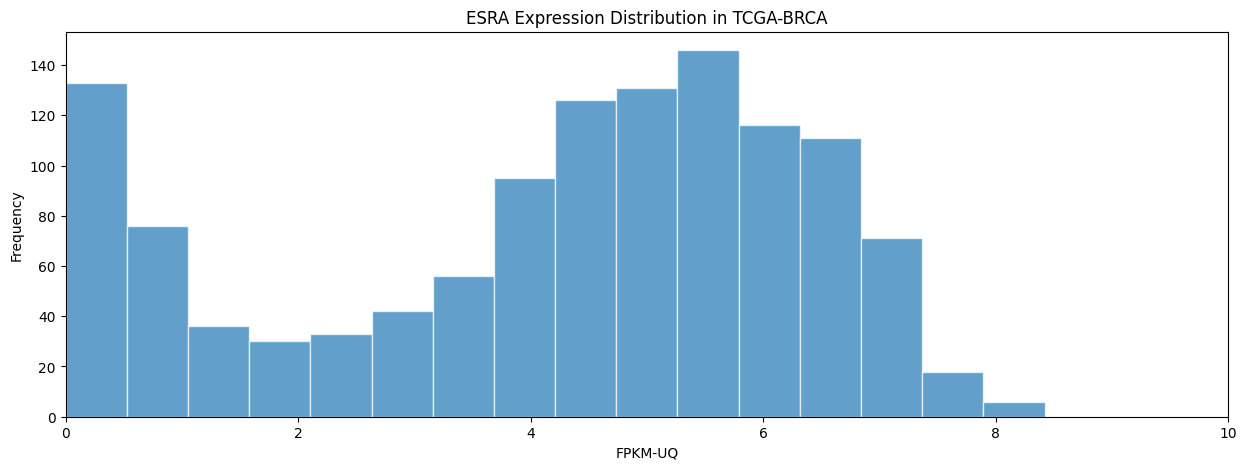

In [18]:
_, axes = plt.subplots(figsize=(15, 5))

axes.hist(
    esra_expression,
    bins=np.linspace(0, 10, 20),
    edgecolor='white',
    alpha=0.7,
    )

axes.set_xlim(0, 10)

plt.title('ESRA Expression Distribution in TCGA-BRCA')
plt.xlabel('FPKM-UQ')
plt.ylabel('Frequency')
plt.show()


In [ ]:
kmf = KaplanMeierFitter()

df_clinical = df_clinical.dropna(subset=["event", "duration"])
kmf.fit(df_clinical["duration"], event_observed=df_clinical["event"])

_, axes = plt.subplots(figsize=(15,5))
kmf.plot_survival_function()
plt.title(f"Median Survival Time: {kmf.median_survival_time_:.2f} years")
plt.xlabel("Time (years)")
plt.ylabel("Survival Probability")
plt.xlim(0, df_clinical["duration"].max())
plt.ylim(0, 1)

In [16]:
df.index = [id_.split('.')[0] for id_ in df.index]
df.head()

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,TCGA-AO-A1KQ-01A,TCGA-E2-A1LI-01A,TCGA-BH-A18L-11A,TCGA-B6-A0WV-01A,TCGA-E2-A1LE-01A,TCGA-A2-A0CO-01A,TCGA-AN-A0AK-01A,TCGA-BH-A28Q-01A,TCGA-3C-AALJ-01A,TCGA-BH-A0BM-01A,TCGA-AO-A03O-01A,TCGA-AC-A4ZE-01A,TCGA-E9-A22A-01A,TCGA-AR-A0TW-01A,TCGA-BH-A1FE-01A,TCGA-BH-A1FE-11B,TCGA-A2-A3XX-01A,TCGA-A8-A095-01A,TCGA-AN-A0FL-01A,TCGA-D8-A1Y2-01A,TCGA-C8-A138-01A,TCGA-AR-A255-01A,TCGA-GM-A5PV-01A,TCGA-E2-A108-01A,TCGA-AC-A2BM-01A,TCGA-E2-A1IN-01A,TCGA-A8-A08I-01A,TCGA-AC-A3W7-01A,TCGA-E9-A1QZ-01A,TCGA-EW-A1PH-01A,TCGA-BH-A0W7-01A,TCGA-AR-A24K-01A,TCGA-BH-A0H9-01A,TCGA-BH-A209-11A,TCGA-A8-A09B-01A,TCGA-A2-A0YT-01A,TCGA-BH-A0B5-01A,TCGA-C8-A131-01A,TCGA-A8-A093-01A,TCGA-A1-A0SK-01A,TCGA-3C-AALK-01A,TCGA-AC-A6IV-01A,TCGA-BH-A0GZ-01A,TCGA-A2-A0CV-01A,TCGA-C8-A12Q-01A,TCGA-AR-A1AL-01A,TCGA-BH-A1F6-11B,TCGA-AN-A0XP-01A,TCGA-AN-A046-01A,TCGA-A7-A4SF-01A,TCGA-LL-A740-01A,TCGA-E9-A1N6-11A,TCGA-EW-A1J5-01A,TCGA-BH-A18G-01A,TCGA-A8-A07R-01A,TCGA-EW-A6SB-01A,TCGA-A2-A04Q-01A,TCGA-B6-A0IC-01A,TCGA-C8-A12X-01A,TCGA-Z7-A8R5-01A,TCGA-OL-A97C-01A,TCGA-A2-A0EV-01A,TCGA-AR-A0U4-01A,TCGA-A8-A06X-01A,TCGA-PL-A8LY-01A,TCGA-A2-A4S2-01A,TCGA-A7-A0CH-11A,TCGA-A2-A04Y-01A,TCGA-D8-A1JA-01A,TCGA-D8-A27E-01A,TCGA-A8-A06O-01A,TCGA-A1-A0SO-01A,TCGA-BH-A1F2-11A,TCGA-BH-A18N-11A,TCGA-A7-A13G-11A,TCGA-A7-A26J-01A,TCGA-GM-A2D9-01A,TCGA-LL-A5YP-01A,TCGA-A7-A26J-01B,TCGA-A7-A26E-01B,TCGA-E2-A1IU-01A,TCGA-A7-A26E-01A,TCGA-AC-A2FB-01A,TCGA-A2-A04W-01A,TCGA-A2-A0T1-01A,TCGA-B6-A0IQ-01A,TCGA-E9-A1N3-01A,TCGA-BH-A5IZ-01A,TCGA-AC-A2B8-01A,TCGA-BH-A204-01A,TCGA-AO-A03U-01B,TCGA-LL-A7SZ-01A,TCGA-A8-A09Q-01A,TCGA-BH-AB28-01A,TCGA-D8-A1XZ-01A,TCGA-E2-A1LL-01A,TCGA-AO-A12E-01A,TCGA-S3-AA12-01A,TCGA-A7-A13F-11A,TCGA-A2-A3XY-01A,TCGA-E2-A15J-01A,TCGA-E2-A1IE-01A,TCGA-BH-A1F0-11B,TCGA-AR-A24L-01A,TCGA-A8-A0AB-01A,TCGA-BH-A0B7-11A,TCGA-A1-A0SJ-01A,TCGA-A7-A4SA-01A,TCGA-S3-AA10-01A,TCGA-BH-A0BT-11A,TCGA-AR-A1AJ-01A,TCGA-LL-A5YL-01A,TCGA-E9-A244-01A,TCGA-B6-A0X0-01A,TCGA-AO-A1KT-01A,TCGA-E2-A1LK-01A,TCGA-EW-A1P4-01A,TCGA-E2-A14R-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A1FL-01A,TCGA-A2-A0ST-01A,TCGA-E9-A22H-01A,TCGA-A1-A0SI-01A,TCGA-B6-A0IN-01A,TCGA-E2-A15K-01A,TCGA-E2-A15K-06A,TCGA-AR-A24Z-01A,TCGA-E9-A1NG-01A,TCGA-AR-A1AW-01A,TCGA-D8-A1JK-01A,TCGA-3C-AALI-01A,TCGA-AC-A7VB-01A,TCGA-BH-A0B8-11A,TCGA-BH-A0E7-01A,TCGA-AC-A6NO-01A,TCGA-C8-A8HP-01A,TCGA-BH-A0DO-01B,TCGA-AO-A0JL-01A,TCGA-A7-A0CJ-01A,TCGA-BH-A0BJ-11A,TCGA-E2-A1LH-01A,TCGA-BH-A18Q-01A,TCGA-BH-A0DG-11A,TCGA-A8-A097-01A,TCGA-AO-A03T-01A,TCGA-D8-A27T-01A,TCGA-D8-A1JS-01A,TCGA-BH-A0DL-01A,TCGA-EW-A423-01A,TCGA-A7-A5ZX-01A,TCGA-C8-A26Y-01A,TCGA-BH-A2L8-01A,TCGA-D8-A1JI-01A,TCGA-D8-A3Z5-01A,TCGA-A1-A0SM-01A,TCGA-BH-A0AV-01A,TCGA-A8-A075-01A,TCGA-BH-A1FM-01A,TCGA-A8-A08C-01A,TCGA-B6-A0I9-01A,TCGA-AO-A0JM-01A,TCGA-AC-A23H-11A,TCGA-AQ-A54N-01A,TCGA-AO-A0JG-01A,TCGA-AO-A12G-01A,TCGA-GM-A2DN-01A,TCGA-E2-A15M-01A,TCGA-BH-A8G0-01A,TCGA-A8-A082-01A,TCGA-A2-A0EN-01A,TCGA-A7-A13E-11A,TCGA-AR-A24X-01A,TCGA-A7-A13E-01B,TCGA-OK-A5Q2-01A,TCGA-D8-A142-01A,TCGA-A2-A0CS-01A,TCGA-D8-A1Y0-01A,TCGA-E9-A22D-01A,TCGA-BH-A0HI-01A,TCGA-BH-A0C7-01B,TCGA-A7-A3J1-01A,TCGA-A7-A2KD-01A,TCGA-S3-AA14-01A,TCGA-E2-A1LS-11A,TCGA-BH-A0AY-01A,TCGA-BH-A0AY-11A,TCGA-AC-A3QQ-01B,TCGA-E9-A1RB-01A,TCGA-D8-A1XK-01A,TCGA-OL-A66I-01A,TCGA-A2-A0CT-01A,TCGA-A8-A09N-01A,TCGA-BH-A0AU-11A,TCGA-D8-A1XQ-01A,TCGA-C8-A135-01A,TCGA-D8-A1X9-01A,TCGA-AO-A0JE-01A,TCGA-HN-A2OB-01A,TCGA-EW-A1IY-01A,TCGA-A8-A09M-01A,TCGA-A8-A0A1-01A,TCGA-E9-A1RH-11A,TCGA-E9-A1RH-01A,TCGA-BH-A1EV-01A,TCGA-BH-A1EV-11A,TCGA-A8-A09I-01A,TCGA-AR-A2LR-01A,TCGA-C8-A1HO-01A,TCGA-EW-A2FW-01A,TCGA-AR-A2LL-01A,TCGA-5L-AAT1-01A,TCGA-A7-A0DA-01A,TCGA-A8-A091-01A,TCGA-BH-A0C0-11A,TCGA-AC-A2QH-01B,TCGA-B6-A0IK-01A,TCGA-AC-A2QH-01A,TCGA-GM-A2DO-01A,TCGA-EW-A6SD-01A,TCGA-A8-A07G-01A,TCGA-AR-A24Q-01A,TCGA-A2-A0D4-01A,TCGA-AC-A8OP-01A,TCGA-LL-A442-01A,TCGA-D8-A143-01A,TCGA

### Merge the datasets

In [19]:
esra_expression

TCGA-D8-A146-01A    6.608116
TCGA-AQ-A0Y5-01A    2.614239
TCGA-C8-A274-01A    6.707864
TCGA-BH-A0BD-01A    4.417150
TCGA-B6-A1KC-01B    5.590725
                      ...   
TCGA-BH-A0EI-01A    4.817199
TCGA-E2-A1IO-01A    4.530795
TCGA-E2-A15R-01A    6.808057
TCGA-B6-A0IP-01A    6.549005
TCGA-A1-A0SN-01A    5.714070
Name: ENSG00000091831, Length: 1226, dtype: float64

In [20]:
pd.set_option('display.max_columns', None)
df_clinical = df_clinical.merge(esra_expression, left_index=True, right_index=True) 
df_clinical.head()

,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,vital_status.demographic,age_at_index.demographic,days_to_birth.demographic,year_of_birth.demographic,year_of_death.demographic,primary_site.project,project_id.project,disease_type.project,name.project,name.program.project,tissue_source_site_id.tissue_source_site,code.tissue_source_site,name.tissue_source_site,project.tissue_source_site,bcr_id.tissue_source_site,days_to_death.demographic,entity_submitter_id.annotations,notes.annotations,submitter_id.annotations,classification.annotations,entity_id.annotations,created_datetime.annotations,annotation_id.annotations,entity_type.annotations,updated_datetime.annotations,case_id.annotations,state.annotations,category.annotations,status.annotations,case_submitter_id.annotations,synchronous_malignancy.diagnoses,ajcc_pathologic_stage.diagnoses,days_to_diagnosis.diagnoses,last_known_disease_status.diagnoses,tissue_or_organ_of_origin.diagnoses,days_to_last_follow_up.diagnoses,age_at_diagnosis.diagnoses,primary_diagnosis.diagnoses,prior_malignancy.diagnoses,year_of_diagnosis.diagnoses,prior_treatment.diagnoses,ajcc_staging_system_edition.diagnoses,ajcc_pathologic_t.diagnoses,morphology.diagnoses,ajcc_pathologic_n.diagnoses,ajcc_pathologic_m.diagnoses,classification_of_tumor.diagnoses,icd_10_code.diagnoses,site_of_resection_or_biopsy.diagnoses,tumor_grade.diagnoses,progression_or_recurrence.diagnoses,age_at_earliest_diagnosis.diagnoses.xena_derived,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,treatment_id.treatments.diagnoses,submitter_id.treatments.diagnoses,treatment_type.treatments.diagnoses,treatment_or_therapy.treatments.diagnoses,created_datetime.treatments.diagnoses,updated_datetime.treatments.diagnoses,state.treatments.diagnoses,sample_type_id.samples,tumor_descriptor.samples,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples,ENSG00000091831
TCGA-BH-A0W3-01A,3c612e12-6de8-44fa-a095-805c45474821,Ductal and Lobular Neoplasms,3c612e12-6de8-44fa-a095-805c45474821,TCGA-BH-A0W3,Breast,Not Reported,white,female,not hispanic or latino,Alive,58.0,-21369.0,1952.0,NaN,Breast,TCGA-BRCA,"['Squamous Cell Neoplasms', 'Adnexal and Skin ...",Breast Invasive Carcinoma,TCGA,ad5db77f-ce9a-53c8-b7ff-7944acf5c0c6,BH,University of Pittsburgh,Breast invasive carcinoma,NCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Stage IIA,0.0,not reported,"Breast, NOS",728.0,21369.0,"Infiltrating duct carcinoma, NOS",no,2010.0,No,7th,T1c,8500/3,N1a,M0,not reported,C50.9,"Breast, NOS",Not Reported,not reported,21369.0,58.545205,"['1c5f5df0-9317-51f8-95fb-88357c15289d', '9c5a...","['TCGA-BH-A0W3_treatment_1', 'TCGA-BH-A0W3_tre...","['Pharmaceutical Therapy, NOS', 'Radiation The...","['no', 'yes']","['2019-04-28T13:48:22.214306-05:00', '']","['2019-07-31T21:37:34.195388-05:00', '2019-07-...","['released', 'released']",1,Primary,9ad80473-9148-45a7-ad6d-9936a899e022,Primary Tumor,Not Reported,85.0,120.0,OCT,801A4E2F-E26E-424F-BF42-CD0D9CD62BCE,True,Solid Tissue,NaN,False,Tumor,NaN,6.923400
TCGA-AR-A24V-01A,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,Ductal and Lobular Neoplasms,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,TCGA-AR-A24V,Breast,Not Reported,white,female,not hispanic or latino,Alive,52.0,-19027.0,1954.0,NaN,Breast,TCGA-BRCA,"['Squamous Cell Neoplasms', 'Adnexal and Skin ...",Breast Invasive Carcinoma,TCGA,5e793cf6-1554-55db-b2ee-9c772717cea0,AR,Mayo,Breast invasive carcinoma,NCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Stage IIB,0.0,not reported,"Breast, NOS",3203.0,19027.0,"Infiltrating duct carcinoma, NOS",no,2006.0,No,6th,T2,8500/3,N1,M0,not reported,C50.9,"Breast, NOS",Not Reported,not report

In [30]:
df_clinical["age_at_death"] = df_clinical["year_of_death.demographic"] - df_clinical["year_of_birth.demographic"]
df_clinical["age_from_diagnosis_to_death"] = df_clinical["age_at_death"] - df_clinical["age_at_diagnosis.diagnoses"]

In [26]:
# df_clinical["year_of_death.demographic"]-df_clinical["age_at_diagnosis.diagnoses"]

In [31]:
df_clinical[df_clinical["vital_status.demographic"]=="Dead"]

,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,vital_status.demographic,age_at_index.demographic,days_to_birth.demographic,year_of_birth.demographic,year_of_death.demographic,primary_site.project,project_id.project,disease_type.project,name.project,name.program.project,tissue_source_site_id.tissue_source_site,code.tissue_source_site,name.tissue_source_site,project.tissue_source_site,bcr_id.tissue_source_site,days_to_death.demographic,entity_submitter_id.annotations,notes.annotations,submitter_id.annotations,classification.annotations,entity_id.annotations,created_datetime.annotations,annotation_id.annotations,entity_type.annotations,updated_datetime.annotations,case_id.annotations,state.annotations,category.annotations,status.annotations,case_submitter_id.annotations,synchronous_malignancy.diagnoses,ajcc_pathologic_stage.diagnoses,days_to_diagnosis.diagnoses,last_known_disease_status.diagnoses,tissue_or_organ_of_origin.diagnoses,days_to_last_follow_up.diagnoses,age_at_diagnosis.diagnoses,primary_diagnosis.diagnoses,prior_malignancy.diagnoses,year_of_diagnosis.diagnoses,prior_treatment.diagnoses,ajcc_staging_system_edition.diagnoses,ajcc_pathologic_t.diagnoses,morphology.diagnoses,ajcc_pathologic_n.diagnoses,ajcc_pathologic_m.diagnoses,classification_of_tumor.diagnoses,icd_10_code.diagnoses,site_of_resection_or_biopsy.diagnoses,tumor_grade.diagnoses,progression_or_recurrence.diagnoses,age_at_earliest_diagnosis.diagnoses.xena_derived,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,treatment_id.treatments.diagnoses,submitter_id.treatments.diagnoses,treatment_type.treatments.diagnoses,treatment_or_therapy.treatments.diagnoses,created_datetime.treatments.diagnoses,updated_datetime.treatments.diagnoses,state.treatments.diagnoses,sample_type_id.samples,tumor_descriptor.samples,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples,ENSG00000091831,age_at_death,age_from_diagnosis_to_death
TCGA-BH-A203-01A,b3264748-947a-43aa-b227-b294fbcc8447,Ductal and Lobular Neoplasms,b3264748-947a-43aa-b227-b294fbcc8447,TCGA-BH-A203,Breast,Not Reported,white,female,not hispanic or latino,Dead,78.0,-28609.0,1918.0,1999.0,Breast,TCGA-BRCA,"['Squamous Cell Neoplasms', 'Adnexal and Skin ...",Breast Invasive Carcinoma,TCGA,ad5db77f-ce9a-53c8-b7ff-7944acf5c0c6,BH,University of Pittsburgh,Breast invasive carcinoma,NCH,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Stage IIB,0.0,not reported,"Breast, NOS",NaN,28609.0,"Infiltrating duct carcinoma, NOS",no,1996.0,No,5th,T2,8500/3,N1b,M0,not reported,C50.9,"Breast, NOS",Not Reported,not reported,28609.0,78.380822,"['80f97062-0ac0-54d2-a229-42b04fc80d5d', 'b165...","['TCGA-BH-A203_treatment_1', 'TCGA-BH-A203_tre...","['Pharmaceutical Therapy, NOS', 'Radiation The...","['not reported', 'not reported']","['2019-04-28T14:01:42.724351-05:00', '']","['2019-07-31T21:54:06.328454-05:00', '2019-07-...","['released', 'released']",1,Primary,002997ef-3b93-443a-80a3-bae63e129d99,Primary Tumor,Not Reported,5418.0,340.0,OCT,3EBBE51B-6D17-4A77-AAE1-E0424CEA56DB,True,Solid Tissue,NaN,False,Tumor,NaN,1.255803,81.0,-28528.0
TCGA-BH-A203-11A,b3264748-947a-43aa-b227-b294fbcc8447,Ductal and Lobular Neoplasms,b3264748-947a-43aa-b227-b294fbcc8447,TCGA-BH-A203,Breast,Not Reported,white,female,not hispanic or latino,Dead,78.0,-28609.0,1918.0,1999.0,Breast,TCGA-BRCA,"['Squamous Cell Neoplasms', 'Adnexal and Skin ...",Breast Invasive Carcinoma,TCGA,ad5db77f-ce9a-53c8-b7ff-7944acf5c0c6,BH,University of Pittsburgh,Breast invasive carcinoma,NCH,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Stage IIB,0.0,not reported,"Breast, NOS",NaN,28609.0,"Infiltrating duct carci

In [22]:
df_clinical.describe()

,age_at_index.demographic,days_to_birth.demographic,year_of_birth.demographic,year_of_death.demographic,days_to_death.demographic,days_to_diagnosis.diagnoses,days_to_last_follow_up.diagnoses,age_at_diagnosis.diagnoses,year_of_diagnosis.diagnoses,age_at_earliest_diagnosis.diagnoses.xena_derived,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,sample_type_id.samples,days_to_collection.samples,initial_weight.samples,days_to_sample_procurement.samples,ENSG00000091831
count,1225.000000,1209.000000,1222.000000,144.000000,199.000000,1225.0,1081.000000,1209.000000,1223.000000,1209.000000,1209.000000,1226.000000,1224.000000,1211.000000,4.0,1226.000000
mean,58.299592,-21527.156328,1949.338789,2004.298611,1577.773869,0.0,1181.889917,21527.156328,2007.641864,21527.156328,58.978510,1.950245,1134.475490,310.902560,0.0,4.171168
std,13.313314,4847.109802,13.809507,4.048793,1237.610387,0.0,1150.231952,4847.109802,4.409588,4847.109802,13.279753,2.909234,1497.463753,272.154007,0.0,2.199084
min,26.000000,-32872.000000,1902.000000,1992.000000,0.000000,0.0,-7.000000,9706.000000,1988.000000,9706.000000,26.591781,1.000000,16.000000,5.000000,0.0,0.029135
25%,48.000000,-24826.000000,1940.000000,2001.000000,658.500000,0.0,435.000000,17871.000000,2006.000000,17871.000000,48.961644,1.000000,157.750000,130.000000,0.0,2.623264
50%,58.000000,-21501.000000,1950.000000,2005.000000,1272.000000,0.0,782.000000,21501.000000,2009.000000,21501.000000,58.906849,1.000000,492.000000,220.000000,0.0,4.683592
75%,67.000000,-17871.000000,1960.000000,2008.000000,2273.000000,0.0,1604.000000,24826.000000,2010.000000,24826.000000,68.016438,1.000000,1414.250000,395.000000,0.0,5.864055
max,90.000000,-9706.000000,1984.000000,2013.000000,7455.000000,0.0,8605.000000,32872.000000,2013.000000,32872.000000,90.060274,11.000000,7858.000000,2190.000000,0.0,8.236955


In [23]:
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1226 entries, TCGA-BH-A0W3-01A to TCGA-A7-A0D9-11A
Data columns (total 85 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         1226 non-null   object 
 1   disease_type                                               1226 non-null   object 
 2   case_id                                                    1226 non-null   object 
 3   submitter_id                                               1226 non-null   object 
 4   primary_site                                               1226 non-null   object 
 5   alcohol_history.exposures                                  1225 non-null   object 
 6   race.demographic                                           1225 non-null   object 
 7   gender.demographic                                         1225 non-null  

In [60]:
df_clinical.columns

Index(['id', 'disease_type', 'case_id', 'submitter_id', 'primary_site',
       'alcohol_history.exposures', 'race.demographic', 'gender.demographic',
       'ethnicity.demographic', 'vital_status.demographic',
       'age_at_index.demographic', 'days_to_birth.demographic',
       'year_of_birth.demographic', 'year_of_death.demographic',
       'primary_site.project', 'project_id.project', 'disease_type.project',
       'name.project', 'name.program.project',
       'tissue_source_site_id.tissue_source_site', 'code.tissue_source_site',
       'name.tissue_source_site', 'project.tissue_source_site',
       'bcr_id.tissue_source_site', 'days_to_death.demographic',
       'entity_submitter_id.annotations', 'notes.annotations',
       'submitter_id.annotations', 'classification.annotations',
       'entity_id.annotations', 'created_datetime.annotations',
       'annotation_id.annotations', 'entity_type.annotations',
       'updated_datetime.annotations', 'case_id.annotations',
       'state

In [61]:
df_clinical[[col for col in df_clinical.columns if col.startswith("days_to")]]

,days_to_birth.demographic,days_to_death.demographic,days_to_diagnosis.diagnoses,days_to_last_follow_up.diagnoses,days_to_collection.samples,days_to_sample_procurement.samples
TCGA-BH-A0W3-01A,-21369.0,NaN,0.0,728.0,85.0,NaN
TCGA-AR-A24V-01A,-19027.0,NaN,0.0,3203.0,1720.0,NaN
TCGA-E9-A1NE-01A,-10564.0,NaN,0.0,1088.0,31.0,NaN
TCGA-AC-A8OQ-01A,-26535.0,NaN,0.0,34.0,742.0,NaN
TCGA-AC-A23C-01A,-22751.0,NaN,0.0,585.0,198.0,NaN
...,...,...,...,...,...,...
TCGA-BH-A1FH-11B,-17172.0,1034.0,0.0,NaN,4670.0,NaN
TCGA-BH-A1FH-01A,-17172.0,1034.0,0.0,NaN,4670.0,NaN
TCGA-AR-A1AO-01A,-17332.0,NaN,0.0,2618.0,1471.0,NaN
TCGA-A7-A0D9-01A,-13836.0,NaN,0.0,1139.0,173.0,NaN


(array([562., 277., 125.,  79.,  18.,   7.,   5.,   1.,   2.,   5.]),
 array([-1.91780822e-02,  2.34027397e+00,  4.69972603e+00,  7.05917808e+00,
         9.41863014e+00,  1.17780822e+01,  1.41375342e+01,  1.64969863e+01,
         1.88564384e+01,  2.12158904e+01,  2.35753425e+01]),
 <BarContainer object of 10 artists>)

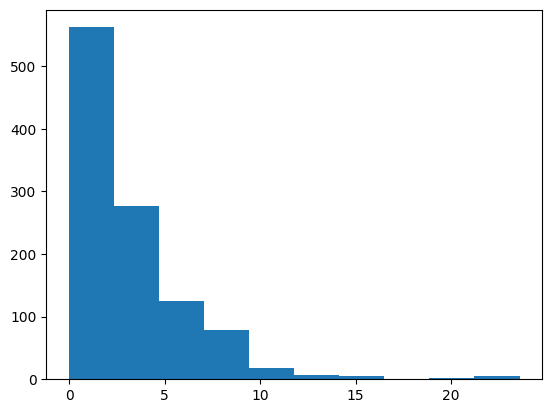

In [63]:
plt.hist(df_clinical["days_to_last_follow_up.diagnoses"]/365)

(array([53., 58., 37., 29., 11.,  8.,  0.,  0.,  2.,  1.]),
 array([ 0.        ,  2.04246575,  4.08493151,  6.12739726,  8.16986301,
        10.21232877, 12.25479452, 14.29726027, 16.33972603, 18.38219178,
        20.42465753]),
 <BarContainer object of 10 artists>)

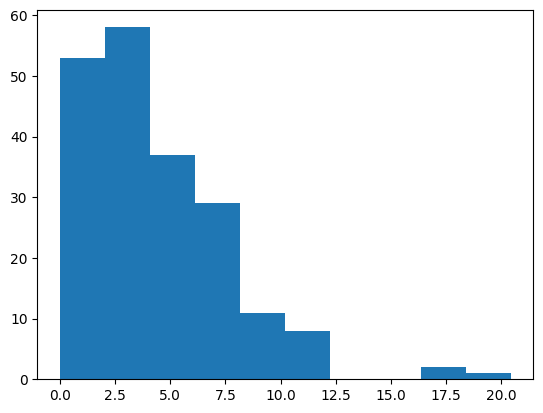

In [48]:
plt.hist(df_clinical["days_to_death.demographic"]/365)

In [54]:
df_clinical["age_at_index.demographic"]

TCGA-BH-A0W3-01A    58.0
TCGA-AR-A24V-01A    52.0
TCGA-E9-A1NE-01A    28.0
TCGA-AC-A8OQ-01A    72.0
TCGA-AC-A23C-01A    62.0
                    ... 
TCGA-BH-A1FH-11B    47.0
TCGA-BH-A1FH-01A    47.0
TCGA-AR-A1AO-01A    47.0
TCGA-A7-A0D9-01A    37.0
TCGA-A7-A0D9-11A    37.0
Name: age_at_index.demographic, Length: 1226, dtype: float64

In [47]:
df_clinical["age_at_death"] - df_clinical["age_at_earliest_diagnosis_in_years.diagnoses.xena_derived"]

TCGA-BH-A0W3-01A         NaN
TCGA-AR-A24V-01A         NaN
TCGA-E9-A1NE-01A         NaN
TCGA-AC-A8OQ-01A         NaN
TCGA-AC-A23C-01A         NaN
                      ...   
TCGA-BH-A1FH-11B    1.953425
TCGA-BH-A1FH-01A    1.953425
TCGA-AR-A1AO-01A         NaN
TCGA-A7-A0D9-01A         NaN
TCGA-A7-A0D9-11A         NaN
Length: 1226, dtype: float64

In [37]:
df_clinical["age_at_earliest_diagnosis_in_years.diagnoses.xena_derived"]

TCGA-BH-A0W3-01A    58.545205
TCGA-AR-A24V-01A    52.128767
TCGA-E9-A1NE-01A    28.942466
TCGA-AC-A8OQ-01A    72.698630
TCGA-AC-A23C-01A    62.331507
                      ...    
TCGA-BH-A1FH-11B    47.046575
TCGA-BH-A1FH-01A    47.046575
TCGA-AR-A1AO-01A    47.484932
TCGA-A7-A0D9-01A    37.906849
TCGA-A7-A0D9-11A    37.906849
Name: age_at_earliest_diagnosis_in_years.diagnoses.xena_derived, Length: 1226, dtype: float64

In [35]:
df_clinical["age_at_earliest_diagnosis.diagnoses.xena_derived"]/365

TCGA-BH-A0W3-01A    58.545205
TCGA-AR-A24V-01A    52.128767
TCGA-E9-A1NE-01A    28.942466
TCGA-AC-A8OQ-01A    72.698630
TCGA-AC-A23C-01A    62.331507
                      ...    
TCGA-BH-A1FH-11B    47.046575
TCGA-BH-A1FH-01A    47.046575
TCGA-AR-A1AO-01A    47.484932
TCGA-A7-A0D9-01A    37.906849
TCGA-A7-A0D9-11A    37.906849
Name: age_at_earliest_diagnosis.diagnoses.xena_derived, Length: 1226, dtype: float64

In [33]:
df_clinical["age_at_diagnosis.diagnoses"]/365

TCGA-BH-A0W3-01A    58.545205
TCGA-AR-A24V-01A    52.128767
TCGA-E9-A1NE-01A    28.942466
TCGA-AC-A8OQ-01A    72.698630
TCGA-AC-A23C-01A    62.331507
                      ...    
TCGA-BH-A1FH-11B    47.046575
TCGA-BH-A1FH-01A    47.046575
TCGA-AR-A1AO-01A    47.484932
TCGA-A7-A0D9-01A    37.906849
TCGA-A7-A0D9-11A    37.906849
Name: age_at_diagnosis.diagnoses, Length: 1226, dtype: float64

In [12]:
df_clinical["vital_status.demographic"].value_counts()

vital_status.demographic
Alive    1025
Dead      200
Name: count, dtype: int64

### Estimate Survival Function with Kaplan-Meier

In [51]:
from lifelines import KaplanMeierFitter

